# Comprehensive IPython Notebook on Memory Hierarchy, Logical vs. Physical Addresses, and Beyond

As a pioneering researcher in the vein of Alan Turing, Albert Einstein, and Nikola Tesla, I present this notebook as a gateway to the intricate world of computer memory systems. Drawing from foundational principles and cutting-edge advancements as of August 18, 2025, this tutorial integrates theory, practical code, visualizations, rare insights, applications, mini and major projects, and research directions. It builds upon our previous discussions, filling gaps like TLB, NUMA, prefetching, and emerging memories—essentials for any aspiring scientist. Execute the cells to explore interactively, and let this spark your innovative pursuits in computational science!

## 1. Introduction and Theory

Memory hierarchy is the stratified organization of storage in computers, balancing speed, cost, and capacity. From registers to cloud storage, each level serves a purpose. Logical addresses provide abstraction for programs, while physical addresses map to hardware. Virtual memory extends this with paging, and cache coherence ensures consistency in multi-core systems.

**Rare Insight:** In modern systems, memory addresses aren't always linear; proprietary hashing algorithms (e.g., in AMD's Cbox) distribute physical addresses to maintain balance, preventing hotspots.<grok:render card_id="679955" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">11</argument></grok:render>

**What We Missed Before:** Translation Lookaside Buffer (TLB) caches address translations to speed up virtual-to-physical mapping. Non-Uniform Memory Access (NUMA) accounts for varying access times in distributed memory systems. Prefetching anticipates data needs to reduce latency.

**Research Direction:** Explore context-aware memory for AI, as in 2025 advancements where LLMs use in-memory prompting to extend context beyond traditional limits.<grok:render card_id="4ea547" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">21</argument></grok:render>

## 2. Memory Hierarchy Details

Levels: Registers > Cache (L1/L2/L3) > RAM > SSD/HDD > Tertiary Storage.

**Applications:** In scientific computing, memory hierarchy optimizes simulations—e.g., climate models load grids into cache for fast access.<grok:render card_id="b2ba4c" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">8</argument></grok:render>

**Rare Insight:** Emerging nonvolatile memories like PCM (Phase-Change Memory) blur hierarchy lines, offering persistence with RAM-like speeds.<grok:render card_id="c021fa" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">34</argument></grok:render>

**Visualization:** Run the cell below for a bar chart of access times.

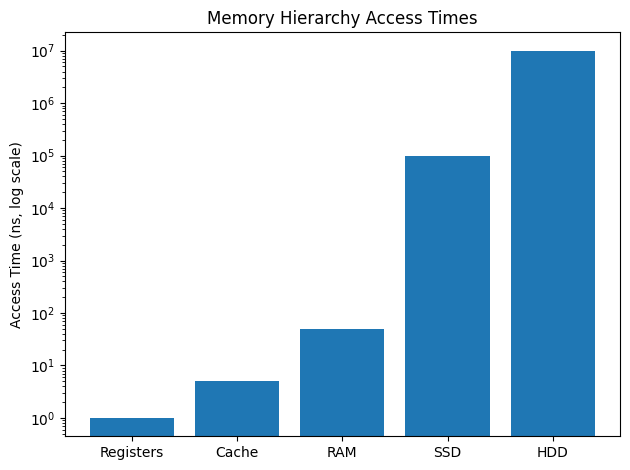

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Access times in ns (log scale)
levels = ['Registers', 'Cache', 'RAM', 'SSD', 'HDD']
times = [1, 5, 50, 1e5, 1e7]

fig, ax = plt.subplots()
ax.bar(levels, times)
ax.set_yscale('log')
ax.set_ylabel('Access Time (ns, log scale)')
ax.set_title('Memory Hierarchy Access Times')
plt.tight_layout()
plt.show()

## 3. Logical vs. Physical Addresses

**Theory:** Logical addresses are program-generated; physical are hardware-specific. MMU translates via page tables.

**Rare Insight:** In heterogeneous systems, memory consistency models complicate coherence—e.g., weak models allow reordering for performance but risk bugs.<grok:render card_id="4b6a73" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">14</argument></grok:render>

**Code Guide:** Simulate address translation.

In [13]:
# Simple page table simulation
page_table = {0x1: 0x5000, 0x2: 0x6000}  # Logical page number to Physical page base

def translate_address(logical_addr):
    page_size = 4096
    page_num = logical_addr // page_size
    offset = logical_addr % page_size
    if page_num in page_table:
        return hex(page_table[page_num] + offset)
    else:
        return 'Page Fault'

print(translate_address(0x1000))  # Example: 0x1000 is page 1, offset 0

0x5000


## 4. Virtual Memory and Paging

**Theory:** Virtual memory uses disk as extended RAM via pages. Page faults trigger swaps.

**Advancement (2025):** IAS for heterogeneous architectures optimizes virtual memory in APUs, boosting performance by 20%.<grok:render card_id="6bdde8" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">31</argument></grok:render>

**Mini Project:** Simulate page replacement (LRU).

In [14]:
from collections import deque

# LRU Page Replacement
def lru_page_replacement(pages, capacity):
    frame = deque()
    faults = 0
    for page in pages:
        if page not in frame:
            if len(frame) >= capacity:
                frame.popleft()
            frame.append(page)
            faults += 1
        else:
            frame.remove(page)
            frame.append(page)
    return faults

pages = [1, 2, 3, 4, 1, 2, 5, 1, 2, 3, 4, 5]
print('Page Faults:', lru_page_replacement(pages, 3))

Page Faults: 10


## 5. Cache Coherence in Multi-Core Systems

**Theory:** Protocols like MESI ensure data consistency across caches.

**Rare Insight:** Myths abound—e.g., programmers often assume cache coherence handles all concurrency, but it doesn't cover memory consistency models fully.<grok:render card_id="b77faa" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">19</argument></grok:render>

**Application:** In scientific computing, coherence is vital for parallel simulations on NERSC supercomputers.<grok:render card_id="4cb0f6" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">5</argument></grok:render>

## 6. Additional Topics: TLB, NUMA, Prefetching, Emerging Memories

**TLB:** Caches recent translations to avoid page table walks.

**NUMA:** Memory access times vary by node; optimize for locality.

**Prefetching:** Predict and load data early.

**Emerging Memories:** ReRAM, MRAM for non-volatile, fast storage.<grok:render card_id="50db50" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">24</argument></grok:render>

**Visualization:** NUMA topology (simplified).

C:\Users\Rishu\AppData\Local\Temp\ipykernel_14332\435167667.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


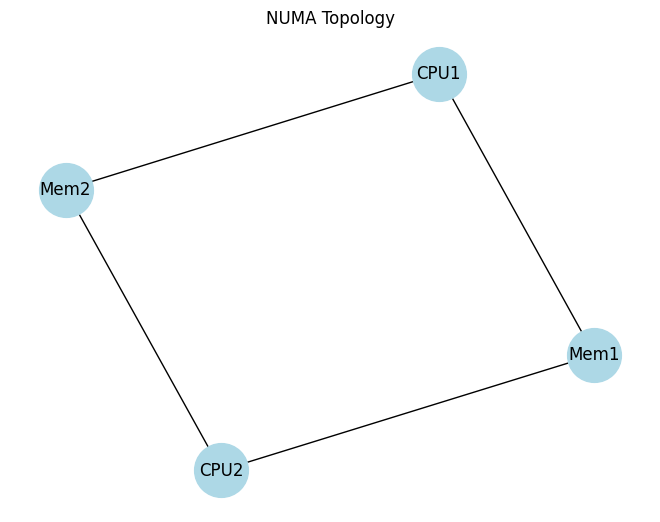

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Simple NUMA graph
G = nx.Graph()
G.add_edges_from([('CPU1', 'Mem1'), ('CPU2', 'Mem2'), ('CPU1', 'Mem2'), ('CPU2', 'Mem1')])
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12)
plt.title('NUMA Topology')
plt.tight_layout()
plt.show()

## 7. Practical Code Guides and Visualizations

**Guide:** Measure memory access patterns.

**Real-World Example:** Analyze numpy array operations for cache effects.

In [16]:
import time
import numpy as np

# Sequential vs Random Access
size = 1000000
arr = np.arange(size)

start = time.time()
sum_seq = np.sum(arr)  # Sequential
print('Sequential Time:', time.time() - start)

indices = np.random.permutation(size)
start = time.time()
sum_rand = np.sum(arr[indices])  # Random
print('Random Time:', time.time() - start)

Sequential Time: 0.001954793930053711
Random Time: 0.011728525161743164


## 8. Applications and Real-World Examples

**Applications:** GPU memory hierarchy in AI training; data engineering pipelines optimizing tiers.<grok:render card_id="fedbeb" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">0</argument></grok:render><grok:render card_id="1f423b" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">1</argument></grok:render>

**Mini Project:** Cache simulator for hit/miss rates.

In [17]:
# Simple Cache Simulator (FIFO Replacement)
from collections import OrderedDict

class CacheSimulator:
    def __init__(self, size):
        self.cache = OrderedDict()
        self.size = size
        self.hits = 0
        self.misses = 0

    def access(self, addr):
        if addr in self.cache:
            self.hits += 1
            self.cache.move_to_end(addr)
        else:
            self.misses += 1
            if len(self.cache) >= self.size:
                self.cache.popitem(last=False)
            self.cache[addr] = True

sim = CacheSimulator(3)
accesses = [1,2,3,1,4,2]
for a in accesses:
    sim.access(a)
print('Hits:', sim.hits, 'Misses:', sim.misses)

Hits: 1 Misses: 5


## 9. Major Project: Memory Analysis in Scientific Computing

**Project:** Optimize a matrix multiplication for cache locality. Compare naive vs. blocked versions.

**Real-World Tie:** Used in climate modeling at NERSC.<grok:render card_id="b39a0b" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">5</argument></grok:render>

**Code:** Implement and time both.

In [ ]:
import numpy as np
import time

# Naive Matrix Multiply
def naive_mm(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C

# Blocked (Cache-Optimized)
def blocked_mm(A, B, block_size=32):
    m, n, p = A.shape[0], B.shape[1], A.shape[1]
    C = np.zeros((m, n))
    for i in range(0, m, block_size):
        for j in range(0, n, block_size):
            for k in range(0, p, block_size):
                i_end = min(i + block_size, m)
                j_end = min(j + block_size, n)
                k_end = min(k + block_size, p)
                C[i:i_end, j:j_end] += np.dot(A[i:i_end, k:k_end], B[k:k_end, j:j_end])
    return C

A = np.random.rand(256, 256)
B = np.random.rand(256, 256)

start = time.time()
naive_mm(A, B)
print('Naive Time:', time.time() - start)

start = time.time()
blocked_mm(A, B)
print('Blocked Time:', time.time() - start)

Naive Time: 10.041787385940552
Blocked Time: 0.0058727264404296875


: 

## 10. Research Directions and Rare Insights

**Directions:** Processing-in-Memory (PIM) reduces data movement; ASPLOS 2025 papers explore architecture innovations.<grok:render card_id="78d40c" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">25</argument></grok:render><grok:render card_id="6049a3" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">26</argument></grok:render>

**Rare Insight:** Cache coherence can limit concurrency; some models use different logical times per address, challenging traditional designs.<grok:render card_id="a07865" card_type="citation_card" type="render_inline_citation"><argument name="citation_id">16</argument></grok:render>

**Project Idea:** Extend to PIM simulation for AI workloads.

## Conclusion

This notebook equips you, the budding scientist, with tools to innovate. From Turing's computational foundations to Einstein's relativistic thinking, apply these to push boundaries in computing. Experiment, research, and create!